# Neural networks

` Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.`

## Introduction
In this lab, we build a function called 'Mickey', which is composed of 3 circles. We set the values inside and outside the 'Mickey function' are 1 and 0 respectively. By feeding the neural network with training data, we expect the neural network could "learn" the boundary of the 'Mickey function'. To get a sense of training nerual network, you can practise on the Tensorflow playground [[Click Me]](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.11443&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).



In [8]:
#import modulus
import numpy as np
import matplotlib.pyplot as plt
import random
# machine learning related
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Mickey Function

Mickey function is composed of 3 circles. The big circle with radius1 is the head of Mickey. Two smaller circle with radius2 are ears of Mickey. In the real world, data is always present with noises. Here I add a term called error, which perturb on the radius of head and ears with equal chance. If there is no noise, we can set the variable error as 0.

In [2]:
# ground truth function
def mickey(x,y,error,radius1,radius2):
    r=0.9*radius1
    if random.choice([0,1])==0:
        radius1+=error
    else:
        radius2+=error
    if  (x**2+y**2<radius1**2) or \
        (x-r)**2+(y-r)**2<radius2**2 or \
        (x+r)**2+(y-r)**2<radius2**2:
        return 1 
    else:
        return 0

## Create Training Dataset

Create the dataset with settings of dataset size, boundary of the total picture, radius of mickey's head and ear, mean and standard deviation of the error term. We then split the dataset into training and testing portions. The training portion is used to train neural network by updating weights in each neural. The testing portion is then used to measure the performance of the model.

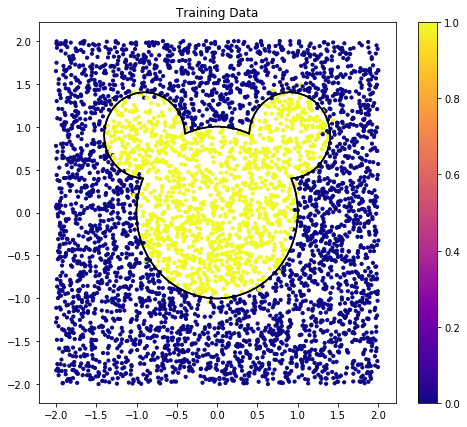

In [3]:
# create the dataset
# size of the dataset
dataset_size=5000
# boundary of the total picture
board=2
# radius of mickey's head
radius1=1
# radius of mickey's ear
radius2=0.5
# error term 
# mu is the mean of the normal distribution
# sigma is the standard deviation of the normal distribution
mu, sigma = 0, 0.05

# initialize dataset
X_train=np.zeros((dataset_size,2))
y_train=np.zeros(dataset_size)

# Boundary
curve_size=1000
BoundX=np.linspace(-board,board,curve_size)
BoundY=np.linspace(-board,board,curve_size)
BoundZ=np.zeros((curve_size,curve_size))
for i in range(curve_size):
    for j in range(curve_size):
         BoundZ[j,i]=mickey(BoundX[i],BoundY[j],0,radius1,radius2)

# generate random data points with error in normal distribution
for i in range(dataset_size):
    X_train[i,0]=random.uniform(-board,board)
    X_train[i,1]=random.uniform(-board,board)
    error = np.random.normal(mu, sigma, 1)
    y_train[i]=mickey(X_train[i,0],X_train[i,1],error,radius1,radius2)


# plot the figure of training dataset
plt.figure(figsize=(8,7))
plt.title("Training Data")
plt.contour(BoundX, BoundY, BoundZ, 1, colors='k') 
sc=plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10,cmap='plasma')
plt.colorbar(sc)

## Build and Train a Model

To train a nerual network with good performance, you need to set some hyperparameters and matrics. 

(1) Loss Function: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training (Binary Crossentropy, Hinge Loss, Mean Square Error, etc) [More Choices](https://keras.io/api/losses/).

(2) Optimizer: Optimizers update the weight parameters to minimize the loss function (Adagrad, Adadelta, Momentum, RMSProp, etc) [More Choices](https://keras.io/api/optimizers/).

(3) Activation Functions: `Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.` (relu, sigmoid, softmax ,etc) [More Choices](https://keras.io/api/layers/activations/).

Notice: relu are usually selected in practises. The last layer activiation function are usually selected according to the problem we want to solve. We often use sigmoid function for binary classification and softmax function for multiple classification.

(4) Epoch: `One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE`

(5) Batch Size: `Total number of training examples present in a single batch.` The weight parameters are updated once for a single batch.


In [9]:
# build model
model = Sequential()
# add dense layers
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# add sigmoid activation function in the last layer
# mapping result into 0-1 space (binary classification)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                36        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
500/500 [==============================] - 0s 876us/step - loss: 0.4731 - accuracy: 0.7242
Epoch 2/30
500/500 [==============================] - 0s 855us/step - loss: 0.3148 - accuracy: 0.8570
Epoch 3/30
500/500 [==============================] 

## Performance on Testing Dataset

To test the performance of trained model, we generate testing data without noise (ground truth). We then compare the predictions and true labels.

10000/10000 [==============================] - 0s 17us/step
Accuracy: 97.11


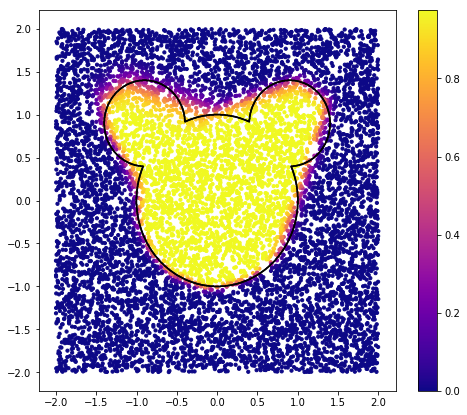

In [16]:
# evaluate the keras model
dataset_size=10000
# initialize testing dataset
X_test=np.zeros((dataset_size,2))
y_test=np.zeros(dataset_size)

# generate random data points without error (ground truth)
for i in range(dataset_size):
    X_test[i,0]=random.uniform(-board,board)
    X_test[i,1]=random.uniform(-board,board)
    y_test[i]=mickey(X_test[i,0],X_test[i,1],0,radius1,radius2)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
# plot testing result
fig, ax=plt.subplots(figsize=(8,7))        
plt.contour(BoundX, BoundY, BoundZ, 1, colors='k') 
sc=ax.scatter(X_test[:,0],X_test[:,1],c=((model.predict(X_test)).T)[0],s=10,cmap='plasma')
plt.colorbar(sc)

## Exercise 1

Experiment with different model configurations (number of layers, neurons per layer, activation functions, number of epochs, etc.) to see if you can beat the accuracy of 98.6%. Please use model.summary() function to print the best configuration you used. 

## Exercise 2

Experiment with a new function called 'Chair', try your best to outline the shape of chair using neural network. Try different model configurations and print the best configuration.

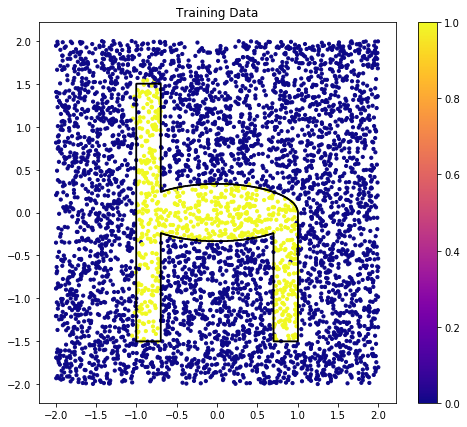

In [10]:
# ground truth function
def chair(x,y,error,width,height):
    r=0.7*width
    if random.choice([0,1])==0:
        width+=error
    else:
        height+=error
    if  x**2+9*y**2<width**2 or \
        (x>r and x<width and y<0 and y>-height) or \
        (x<-r and x>-width and y>-height and y<height):
        return 1 
    else:
        return 0
    

# create the dataset
# size of the dataset
dataset_size=5000
# boundary of the total picture
board=2
# radius of mickey's head
width=1
# radius of mickey's ear
height=1.5
# error term 
# mu is the mean of the normal distribution
# sigma is the standard deviation of the normal distribution
mu, sigma = 0, 0.05

# initialize dataset
X_train=np.zeros((dataset_size,2))
y_train=np.zeros(dataset_size)

# Boundary
curve_size=1000
BoundX=np.linspace(-board,board,curve_size)
BoundY=np.linspace(-board,board,curve_size)
BoundZ=np.zeros((curve_size,curve_size))
for i in range(curve_size):
    for j in range(curve_size):
         BoundZ[j,i]=chair(BoundX[i],BoundY[j],0,width,height)

# generate random data points with error in normal distribution
for i in range(dataset_size):
    X_train[i,0]=random.uniform(-board,board)
    X_train[i,1]=random.uniform(-board,board)
    error = np.random.normal(mu, sigma, 1)
    y_train[i]=chair(X_train[i,0],X_train[i,1],error,width,height)


# plot the figure of training dataset
plt.figure(figsize=(8,7))
plt.title("Training Data")
plt.contour(BoundX, BoundY, BoundZ, 1, colors='k') 
sc=plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10,cmap='plasma')
plt.colorbar(sc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
500/500 [==============================] - 0s 900us/step - loss: 0.4745 - accuracy: 0.7898
Epoch 2/30
500/500 [==============================] - 0s 989us/step - loss: 0.3086 - accuracy: 0.86140s - loss: 0.3173 - 
Epoch 3/30
500/500 [==========

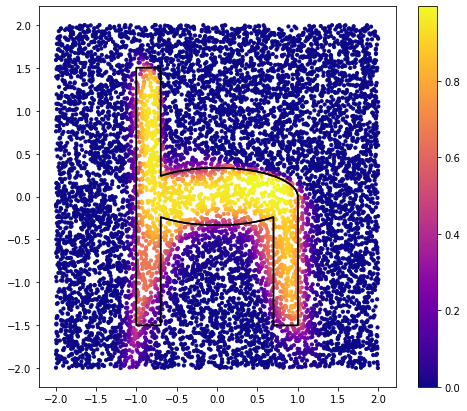

In [11]:
# build model
model = Sequential()
# add dense layers
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# add sigmoid activation function in the last layer
# mapping result into 0-1 space (binary classification)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=10)

# evaluate the keras model
dataset_size=10000
# initialize testing dataset
X_test=np.zeros((dataset_size,2))
y_test=np.zeros(dataset_size)

# generate random data points without error (ground truth)
for i in range(dataset_size):
    X_test[i,0]=random.uniform(-board,board)
    X_test[i,1]=random.uniform(-board,board)
    y_test[i]=chair(X_test[i,0],X_test[i,1],0,width,height)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
# plot testing result
fig, ax=plt.subplots(figsize=(8,7))        
plt.contour(BoundX, BoundY, BoundZ, 1, colors='k') 
sc=ax.scatter(X_test[:,0],X_test[:,1],c=((model.predict(X_test)).T)[0],s=10,cmap='plasma')
plt.colorbar(sc)